# Introduction

Artifical Intelligence is a current topic that is slowly shifting the world into a new direction. This project looks at data to analyze if artifical intelligence has an impact on jobs.

## Overarching Question: Does the integration of artificial intelligence influence technology growth of jobs and the likelihood that those jobs will be automated in the future?

This question brings together the two smaller research questions within this project which are (1) Does increase use of AI lead to the growth of technology within a job? and (2) Does high AI exposure within a job lead to the likelihood of the job becoming automated by 2030? These questions explore the integration of AI in terms of growth of technology and potential automation of the job ultimately leading to the overarching question above. 

# Data

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
file_name = "AI_Impact_on_Jobs_2030.csv"
dataset_path = "data/" + file_name

df = pd.read_csv(dataset_path)

In [139]:
df.head()

Job_Title  Average_Salary  Years_Experience Education_Level  \
0       Security Guard           45795                28        Master's   
1   Research Scientist          133355                20             PhD   
2  Construction Worker          146216                 2     High School   
3    Software Engineer          136530                13             PhD   
4    Financial Analyst           70397                22     High School   

   AI_Exposure_Index  Tech_Growth_Factor  Automation_Probability_2030  \
0               0.18                1.28                         0.85   
1               0.62                1.11                         0.05   
2               0.86                1.18                         0.81   
3               0.39                0.68                         0.60   
4               0.52                1.46                         0.64   

  Risk_Category  Skill_1  Skill_2  Skill_3  Skill_4  Skill_5  Skill_6  \
0          High     0.45     0.10     0.46     0.33     0.14     0.65   
1           Low     0.02     0.52     0.40     0.05     0.97     0.23   
2          High     0.01     0.94     0.56     0.39     0.02     0.23   
3        Medium     0.43     0.21     0.57     0.03     0.84     0.45   
4        Medium     0.75     0.54     0.59     0.97     0.61     0.28   

   Skill_7  Skill_8  Skill_9  Skill_10  
0     0.06     0.72     0.94      0.00  
1     0.09     0.62     0.38      0.98  
2     0.24     0.68     0.61      0.83  
3     0.40     0.93     0.73      0.33  
4     0.30     0.17     0.02      0.42

**Data Overview**

This dataset has come from Kaggle by Khushi Yadav. It is composed of 30 columns and over 3,000 rows. Each row is a profession. The columns used within this research are (1) AI Exposure Index - how much the job interacts with AI tools (0 = no exposure, 1 = highly AI-dependent), (2) Tech Growth Factor - how quickly technology is advancing in the field, and (3) Automation Probability 2030 - the estimated probability that the job will be automated by 2030. Data is analyzed to draw conclusions on the impact of one another. 

# Methods and Results

## First Research Question: Does increase exposure of Artifical Intelligence lead to the growth of technology within a job?

### Methods

I will determine the different number of jobs within the data set by using .unique and len command. 

I will then calculate the average AI exposure or how much the job interacts with AI. I will use that data to generate a bar chart to visually see which job interacts with AI the most. 

I will calculate the mean of the technology factor for each job which represents how quickly technology is advancing within the profession. 

Using both means, I will compare the data generating a chart to see if the AI exposure results in an of increase technology within the field. I will generate a scatterplot that includes the line of regression to show if there is any statistical significance.  

### Results 

In [140]:
number_jobs = df["Job_Title"].unique()
print("Number of different jobs:", len(number_jobs))

Number of different jobs: 20


In [141]:
job_ai_mean = df.groupby("Job_Title")["AI_Exposure_Index"].mean()
job_ai_mean

Job_Title
AI Engineer            0.474286
Chef                   0.528794
Construction Worker    0.504808
Customer Support       0.501504
Data Scientist         0.512874
Doctor                 0.505152
Financial Analyst      0.464437
Graphic Designer       0.527062
HR Specialist          0.489236
Lawyer                 0.509015
Marketing Manager      0.524478
Mechanic               0.456544
Nurse                  0.520563
Research Scientist     0.478591
Retail Worker          0.505548
Security Guard         0.515000
Software Engineer      0.512914
Teacher                0.497289
Truck Driver           0.520131
UX Researcher          0.475988
Name: AI_Exposure_Index, dtype: float64

<Axes: xlabel='AI_Exposure_Index', ylabel='Job_Title'>

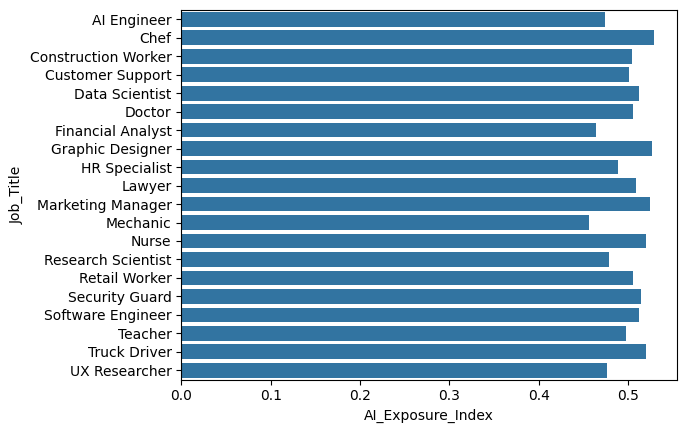

In [142]:
job_ai_mean_df = job_ai_mean.reset_index()
sns.barplot(data=job_ai_mean_df, x="AI_Exposure_Index", y="Job_Title")

From the dataset - Chef, Graphic Designer, Marketing Manager, Nurse, and Truck Driver are the top jobs that interact with Artifical Intelligence.

In [143]:
job_tech_mean = df.groupby("Job_Title")["Tech_Growth_Factor"].mean()
job_tech_mean

Job_Title
AI Engineer            0.978500
Chef                   1.081348
Construction Worker    0.998397
Customer Support       0.991353
Data Scientist         0.959940
Doctor                 0.963788
Financial Analyst      1.027815
Graphic Designer       0.992500
HR Specialist          0.986815
Lawyer                 1.015076
Marketing Manager      1.012164
Mechanic               0.976471
Nurse                  0.986408
Research Scientist     0.962081
Retail Worker          0.997161
Security Guard         0.986558
Software Engineer      0.976057
Teacher                1.008795
Truck Driver           1.026797
UX Researcher          0.986886
Name: Tech_Growth_Factor, dtype: float64

<Axes: xlabel='Tech_Growth_Factor', ylabel='Job_Title'>

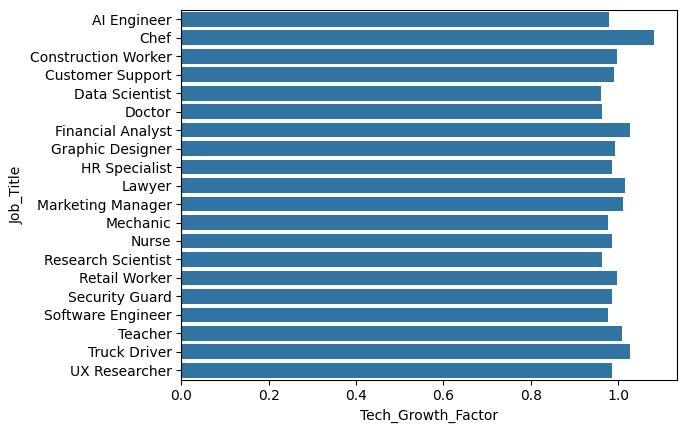

In [144]:
job_tech_mean_df = job_tech_mean.reset_index()
sns.barplot(data=job_tech_mean_df, x="Tech_Growth_Factor", y="Job_Title")

From the dataset - Chef, Financial Analyst, , Truck Driver, Lawyer, and Marketing Manager are the top 5 jobs where technology is advancing. 

<Axes: xlabel='AI_Exposure_Index', ylabel='Tech_Growth_Factor'>

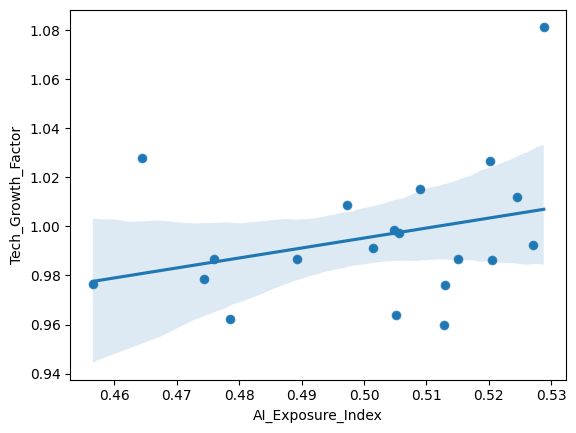

In [145]:
tech_summary = job_ai_mean_df.merge(job_tech_mean_df, on="Job_Title")

sns.scatterplot(data=tech_summary,x="AI_Exposure_Index",y="Tech_Growth_Factor")
sns.regplot(data=tech_summary,x="AI_Exposure_Index",y="Tech_Growth_Factor")

In [146]:
correlation = tech_summary["AI_Exposure_Index"].corr(tech_summary["Tech_Growth_Factor"])
print("Correlation between AI exposure and technology growth likelihood:", correlation)

Correlation between AI exposure and technology growth likelihood: 0.30877812744517064


The correlation is 0.308 and the line of regression is a weak positive slope where the relationship between the use of AI and technology growth is not strong. 

## Second Research Question: Does high AI exposure within a job lead to the likelihood of the job becoming automated by 2030?


### Methods

I will calculate the average probability job automation (the estimated probability that the job will be automated by 2030) by using similar commands from above. I will use the data to generate a bar chart to visually see which jobs are expected to be automated by 2030.  

I will then use the calculated the mean of AI exposure from the first research question to compare datasets.

Using both means (average probability job automation and average AI exposure), I will compare the data, generating a chart to graphically analyze if AI use impacts the job's automation in 2030. I will generate a scatterplot that will include the line of regression to show if there is any statistical significance.  


### Results 

In [147]:
job_automation_mean = df.groupby("Job_Title")["Automation_Probability_2030"].mean()

job_automation_mean

Job_Title
AI Engineer            0.172214
Chef                   0.495674
Construction Worker    0.825962
Customer Support       0.825263
Data Scientist         0.496287
Doctor                 0.176742
Financial Analyst      0.485099
Graphic Designer       0.529000
HR Specialist          0.490764
Lawyer                 0.486439
Marketing Manager      0.494776
Mechanic               0.485294
Nurse                  0.175634
Research Scientist     0.174161
Retail Worker          0.834710
Security Guard         0.833052
Software Engineer      0.508686
Teacher                0.175783
Truck Driver           0.818627
UX Researcher          0.492395
Name: Automation_Probability_2030, dtype: float64

<Axes: xlabel='Automation_Probability_2030', ylabel='Job_Title'>

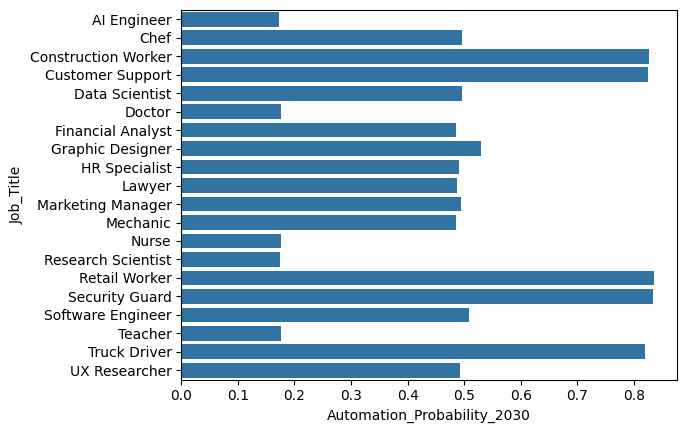

In [148]:
job_automation_df = job_automation_mean.reset_index()
sns.barplot(data=job_automation_df,x="Automation_Probability_2030",y="Job_Title")

From the dataset - Construction Worker, Customer Support, Retail Worker, Security Guard, and Truck Driver are the top average jobs to be automated by 2030. 

<Axes: xlabel='AI_Exposure_Index', ylabel='Job_Title'>

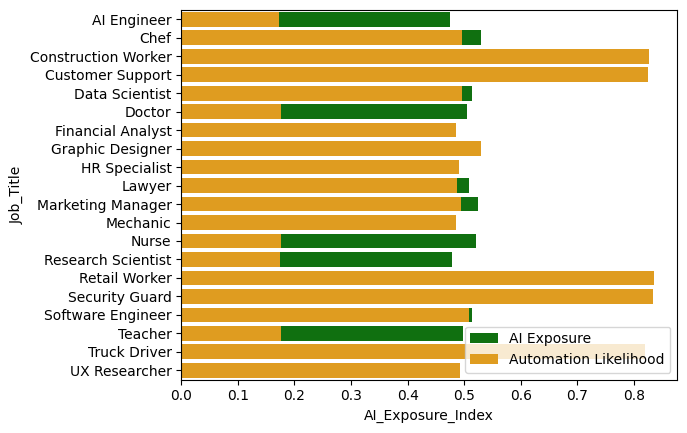

In [149]:
job_summary = job_ai_mean_df.merge(job_automation_df, on="Job_Title")

sns.barplot(data=job_summary, x="AI_Exposure_Index", y="Job_Title", color="green", label="AI Exposure")
sns.barplot( data=job_summary, x="Automation_Probability_2030", y="Job_Title", color="orange", label="Automation Likelihood")


In [150]:
correlation = job_summary["AI_Exposure_Index"].corr(job_summary["Automation_Probability_2030"])
print("Correlation between AI exposure and automation likelihood:", correlation)

Correlation between AI exposure and automation likelihood: 0.2625603926789058


<Axes: xlabel='AI_Exposure_Index', ylabel='Automation_Probability_2030'>

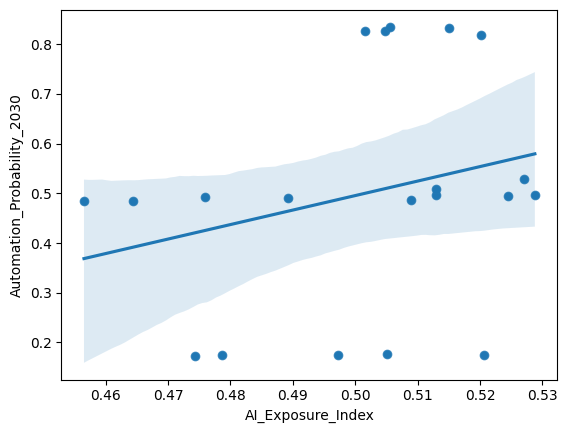

In [151]:
sns.scatterplot(data=job_summary,x="AI_Exposure_Index",y="Automation_Probability_2030")
sns.regplot(data=job_summary,x="AI_Exposure_Index",y="Automation_Probability_2030")


The correlation is 0.262 and the line of regression is a weak positive slope where the relationship between the use of AI and probability that the job will be automated is not strong. 

# Discussion

## Considerations

The results do not give an accurate depiction of the relationship between AI use, technology growth and automation risk. The correlation between AI use and technology growth was weakly positive same as the correlation with AI use and automation of a job. There was some relatioship but it does not strongly predict the use/exposure of AI in a job will increase technology growth or automation of the job. 

One limination of this dataset is it only includes 20 jobs. This does not fully represent the workforce. Another limination of this dataset is the Automation is a probability. It is not known where that probabilty statistic has come from and why that number is the number. 

There could be biases in the data as some of the data is simplified rather than exact. Another bias is the job titles are very broad. For example, there are multiple different types of teachers such as art teacher, mathematics, history, or elementary where there is just teachers as the broad category leading to some bias. 

## Summary

Through this research, I have learned that an increase of AI within a job does not necessarily mean there will be an increase of technology or liklihood of automation of that job. While there was a slight positive increase and relationship this could potentially change over the next new months as this is an evolving topic that continues to change. Based on this data, jobs may integrate AI to support human work rather than replace the job itself. 

It was very suprising to see the results to be so small. From all the information, I have learned about AI I felt that results would have shown a greater liklihood of use of AI, technology growth, and job automation. Going foward this project can help show that AI can be used to support each other's ideas rather than replacing people's job. 